In [132]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import normaltest

In [133]:
sns.set_theme(
    rc={'figure.figsize':(20,10)}
        )

In [134]:
df = pd.read_csv("train - train.csv")
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


Хочу обратить внимание, что столбец Sales может показывать либо количество продаж, либо сумму продаж. Ни в том, ни в другом случае после запятой не может быть три цифры. Так как данных много, будем считать подобные строки аномалиями и не будем их учитывать. Sales - сумма продаж

In [135]:
df['anomaly'] = df['Sales'].apply(lambda x: x[-3])
df = df[df.anomaly == ',']
df

,ID,Order Date,Class,Region,Sub-Category,Sales,anomaly
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08",","
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61",","
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86",","
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13",","
6,5092,30/12/2018,Стандарт,Калиниград,Fasteners,"42478,36",","
...,...,...,...,...,...,...,...
9793,7480,06/01/2015,Стандарт,Москва,Fasteners,"19856,51",","
9794,7481,06/01/2015,Стандарт,Москва,Paper,"31250,09",","
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05",","
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81",","


In [136]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Sales'] = df['Sales'].apply(lambda x: x.replace(',', '.')).astype(float)
df.dtypes
# Перевод колонок в нужный формат

C:\Users\Admin\AppData\Local\Temp\ipykernel_15232\3213075772.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_15232\3213075772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_15232\3213075772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

ID                       int64
Order Date      datetime64[ns]
Class                   object
Region                  object
Sub-Category            object
Sales                  float64
anomaly                 object
dtype: object

In [137]:
all_time_popular_sub_category = df.groupby('Sub-Category', as_index = False).agg({'ID': 'count'}) \
                                    .sort_values('ID', ascending = False) \
                                    .rename(columns = {'ID': 'count_of_sales'})
all_time_popular_sub_category

,Sub-Category,count_of_sales
3,Binders,1082
12,Paper,999
9,Furnishings,718
13,Phones,673
14,Storage,621
2,Art,589
0,Accessories,557
5,Chairs,458
1,Appliances,326
10,Labels,264


<Axes: xlabel='Sub-Category', ylabel='count_of_sales'>

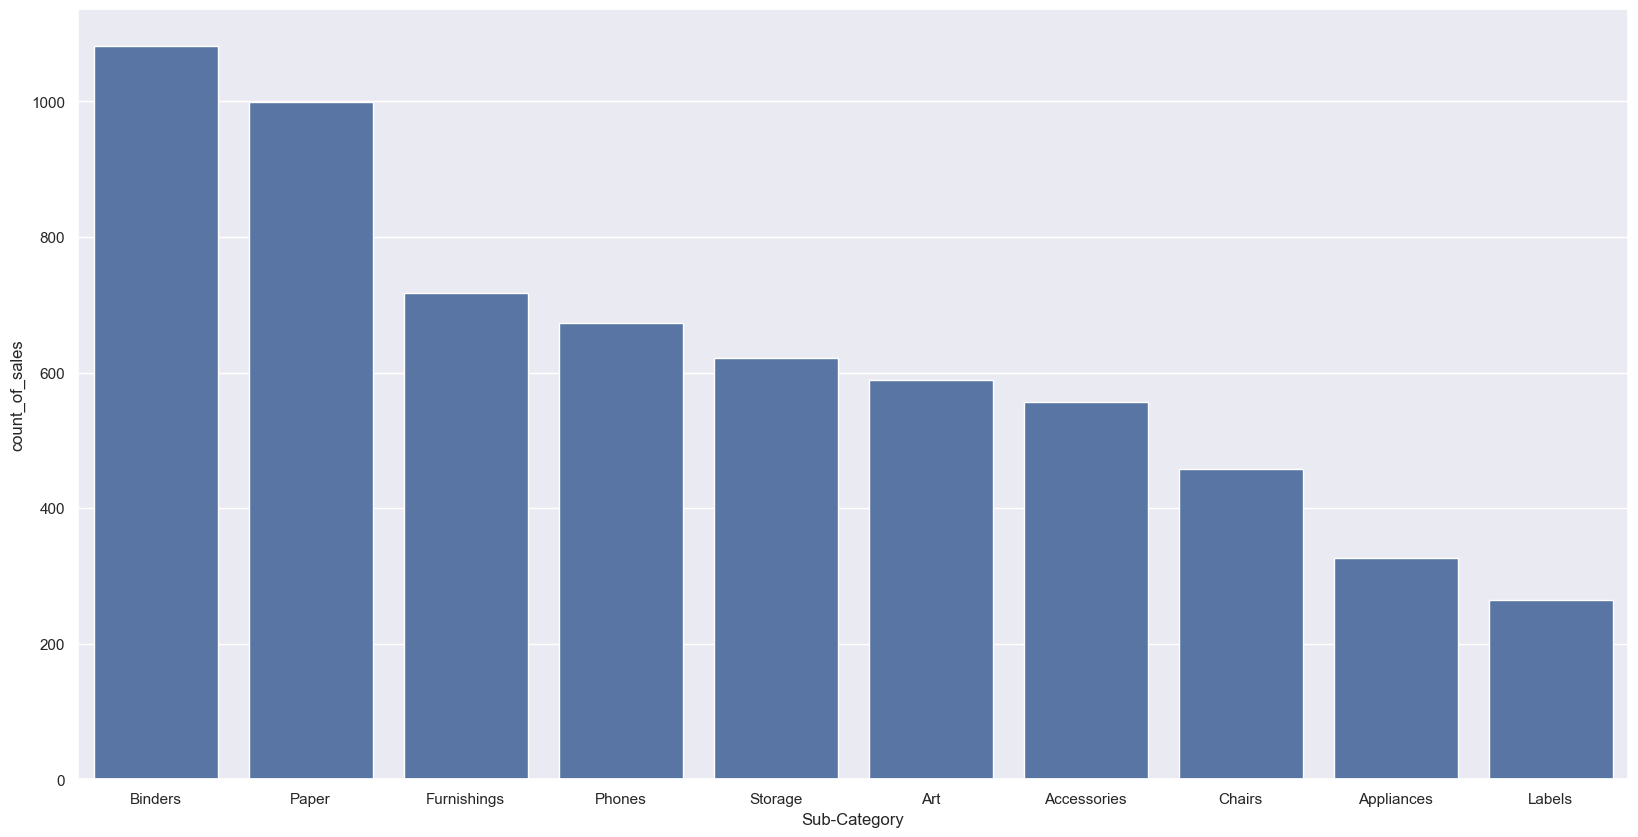

In [138]:
sns.barplot(data = all_time_popular_sub_category.head(10), x = 'Sub-Category', y = 'count_of_sales')

Задание 1 (а)

Наиболее популярные подгруппы по количеству продаж за все время: Binders, Paper, Furnishings, Phones, Storage

In [139]:
df['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

In [140]:
last_two_years_popular_sub_category = df[(df['Order Date'] <= df['Order Date'].max()) & (df['Order Date'] >= df['Order Date'].max() - pd.tseries.offsets.DateOffset(years = 2))] \
                                    .groupby('Sub-Category', as_index = False).agg({'ID': 'count'}) \
                                    .sort_values('ID', ascending = False) \
                                    .rename(columns = {'ID': 'count_of_sales'})
last_two_years_popular_sub_category

,Sub-Category,count_of_sales
3,Binders,664
12,Paper,619
9,Furnishings,421
13,Phones,395
14,Storage,365
2,Art,345
0,Accessories,323
5,Chairs,267
1,Appliances,190
10,Labels,163


<Axes: xlabel='Sub-Category', ylabel='count_of_sales'>

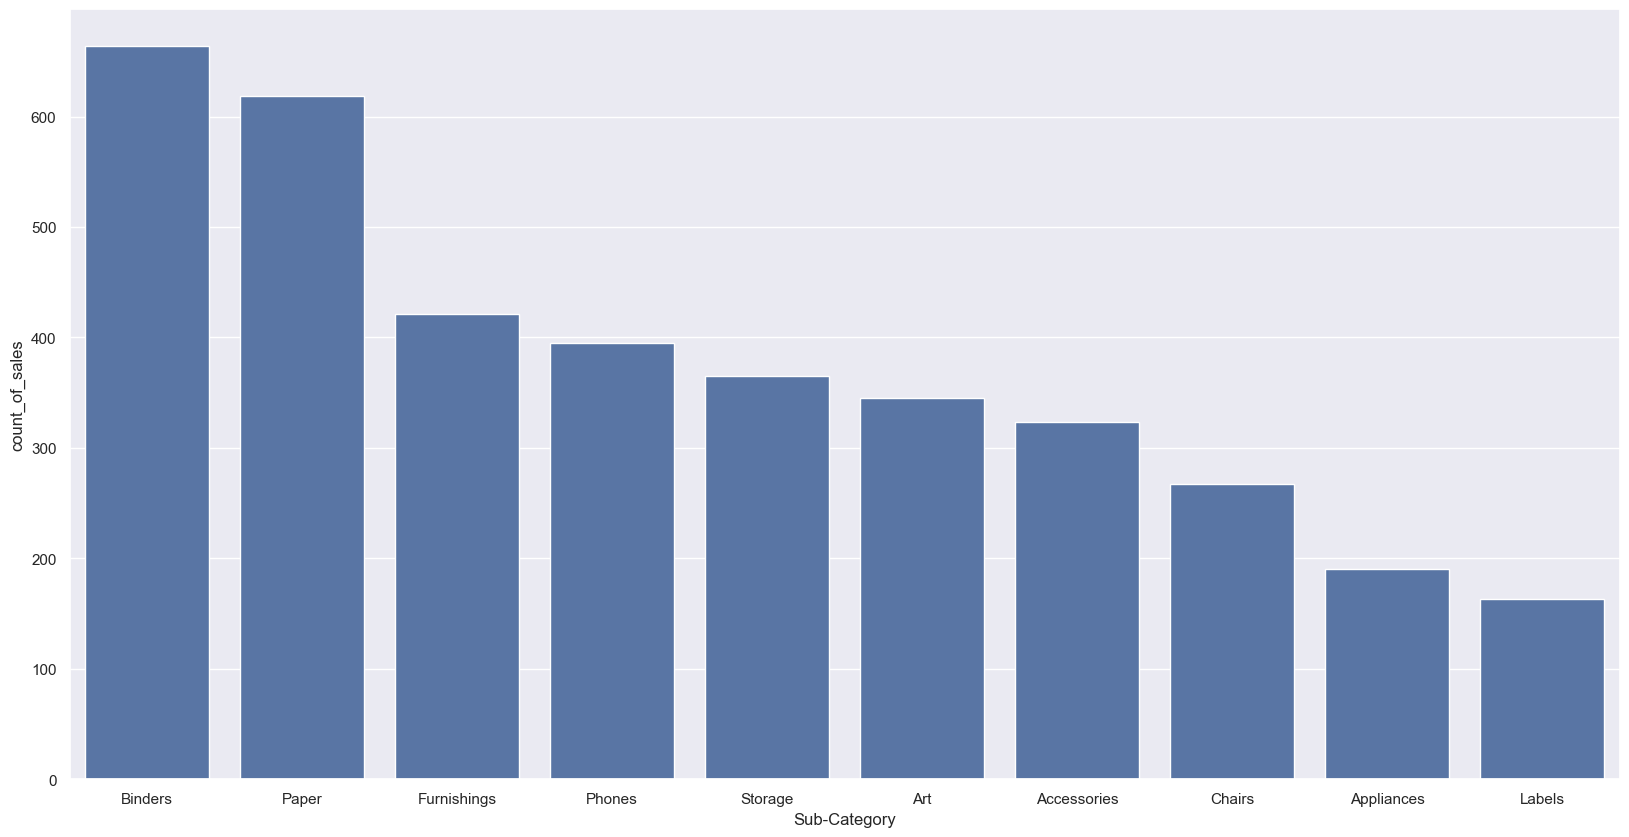

In [141]:
sns.barplot(data = last_two_years_popular_sub_category.head(10), x = 'Sub-Category', y = 'count_of_sales')

Задание 1 (б)

Наиболее популярные подгруппы по количеству продаж за последние два года: Binders, Paper, Furnishings, Phones, Storage

In [142]:
last_year_popular_sub_category = df[(df['Order Date'] <= df['Order Date'].max()) & (df['Order Date'] >= df['Order Date'].max() - pd.tseries.offsets.DateOffset(years = 1))] \
                                    .groupby('Sub-Category', as_index = False).agg({'ID': 'count'}) \
                                    .sort_values('ID', ascending = False) \
                                    .rename(columns = {'ID': 'count_of_sales'})
last_year_popular_sub_category

,Sub-Category,count_of_sales
3,Binders,379
12,Paper,347
9,Furnishings,248
13,Phones,223
2,Art,214
14,Storage,201
0,Accessories,193
5,Chairs,146
1,Appliances,109
10,Labels,90


<Axes: xlabel='Sub-Category', ylabel='count_of_sales'>

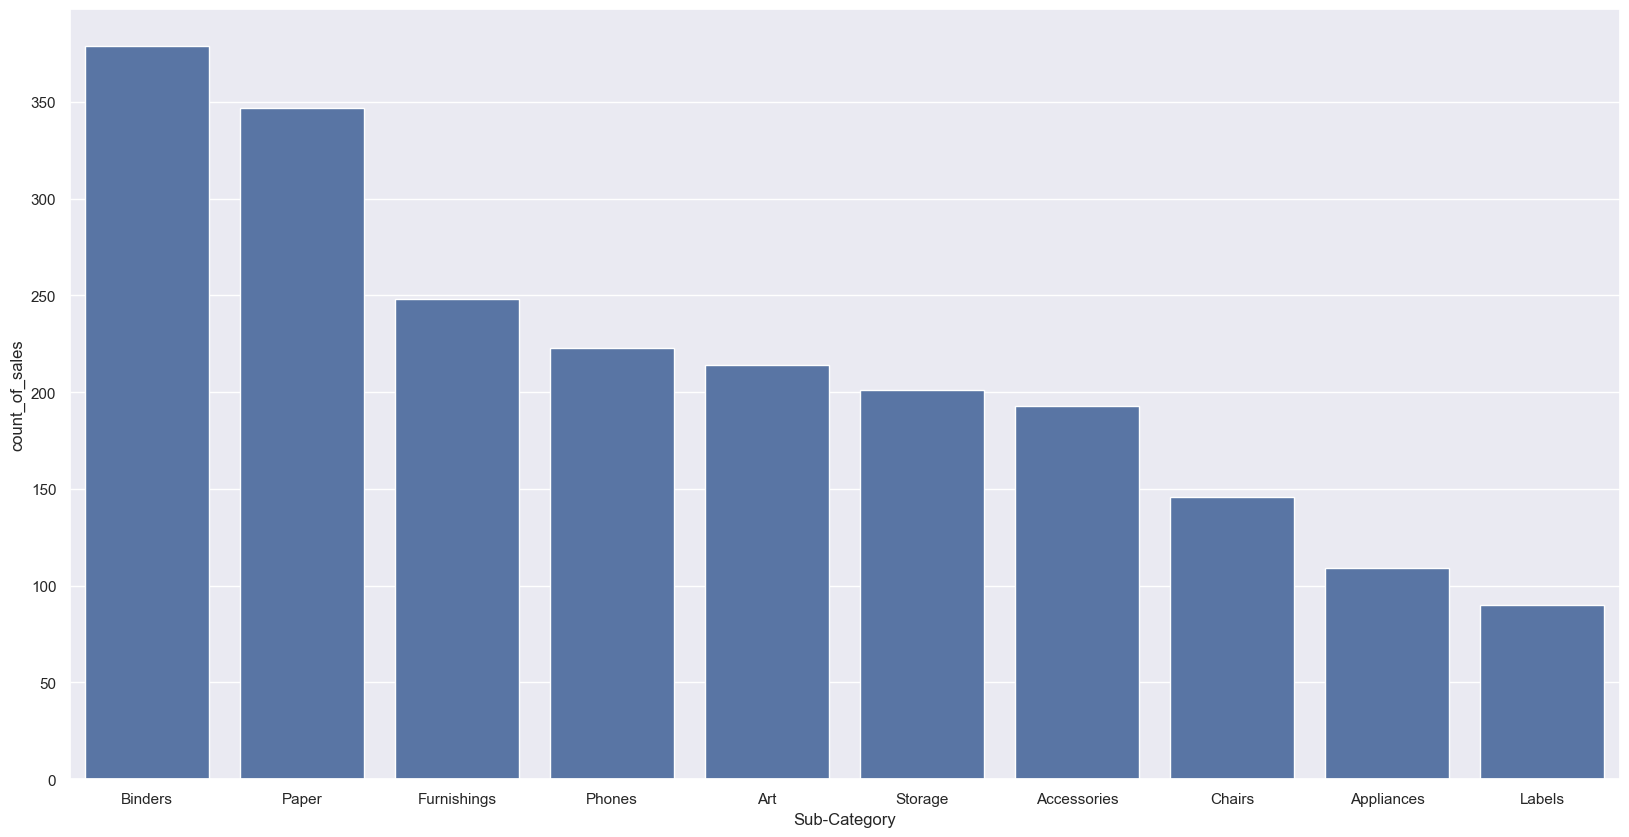

In [143]:
sns.barplot(data = last_year_popular_sub_category.head(10), x = 'Sub-Category', y = 'count_of_sales')

Задание 1 (в)

Наиболее популярные подгруппы по количеству продаж за последний год: Binders, Paper, Furnishings, Phones, Art

Долгое время лидеры по продажам были неизменными. Но в последний год Art вошел в топ 5 лидеров сменив Storage.

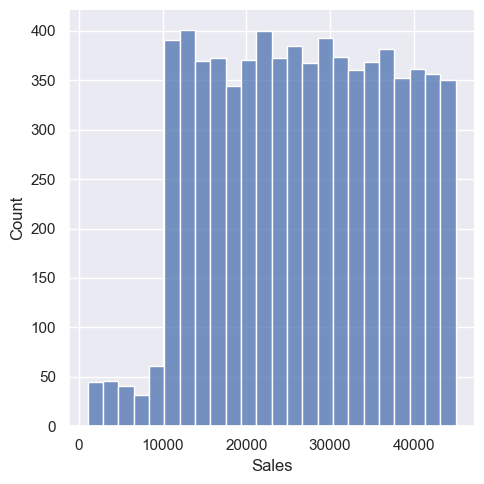

In [144]:
sns.displot(df.Sales)

In [145]:
normaltest(df.Sales)
# Распределение ненормально

NormaltestResult(statistic=1864.467990369187, pvalue=0.0)

<Axes: ylabel='Sales'>

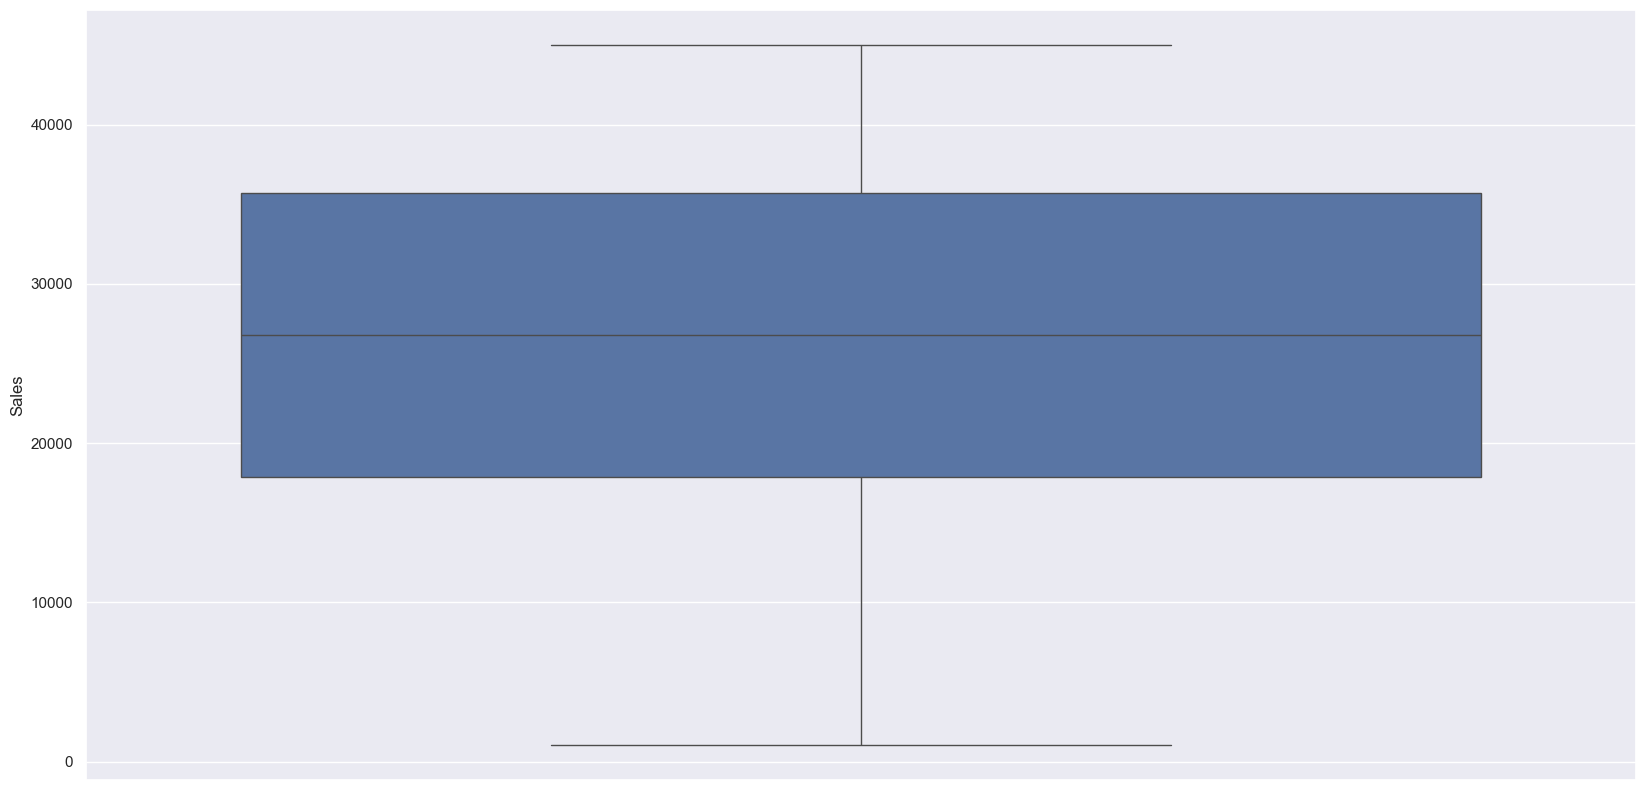

In [150]:
sns.boxplot(data = df, y = 'Sales')

In [152]:
quantiles = df['Sales'].quantile([.025, .975]).to_list()
# Так как у нас отсутсвуют выбросы, для ответа на второе задание возьмем только данные которые соответсвуют 95%му довериткльному интервалу

<Axes: ylabel='Sales'>

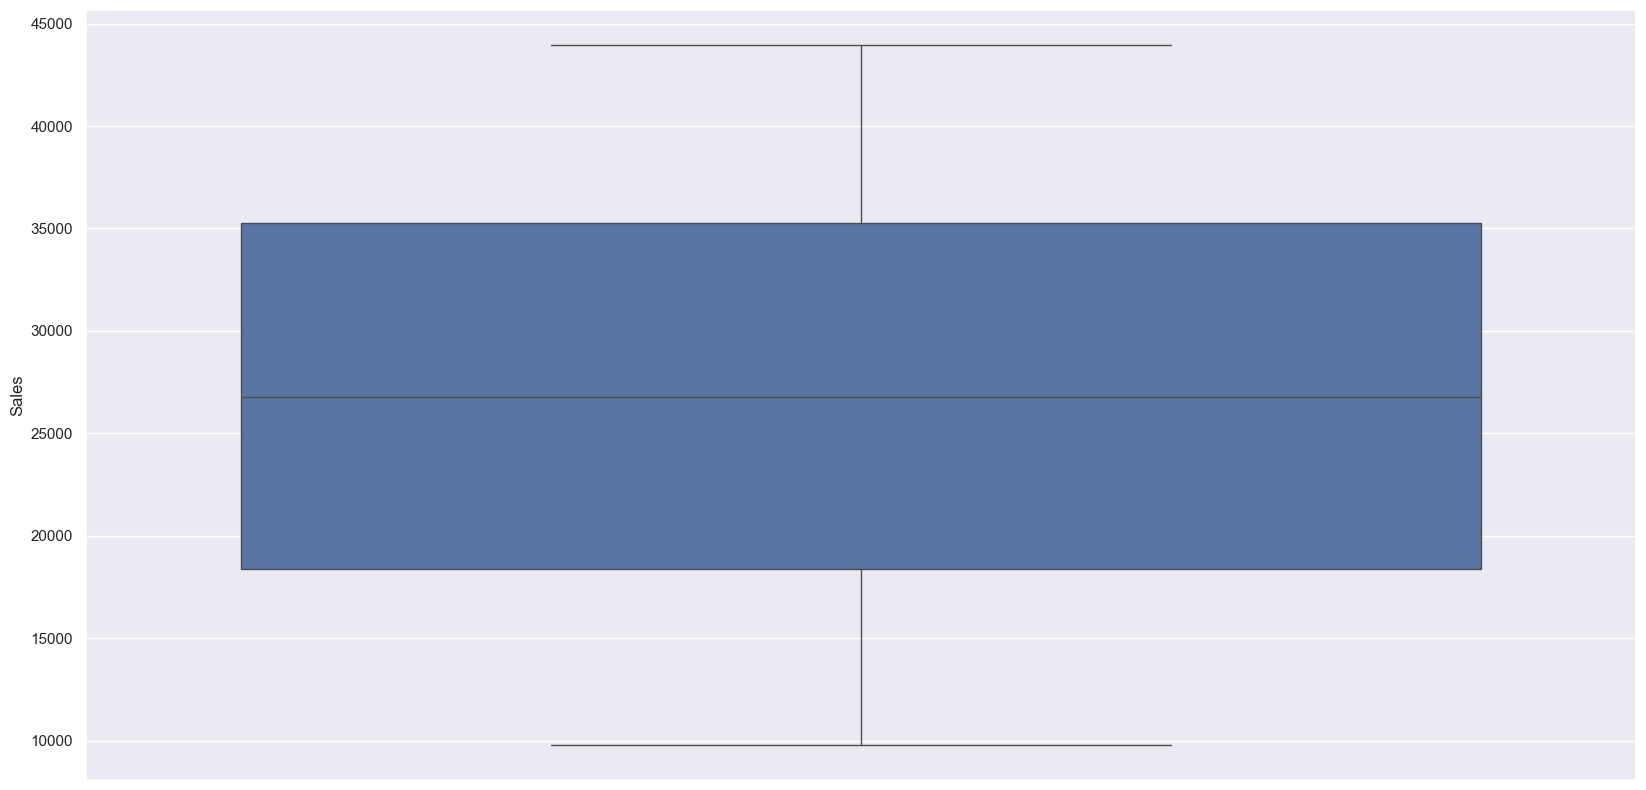

In [158]:
sns.boxplot(data = df[(df.Sales < quantiles[1]) & (df.Sales > quantiles[0])], y = df[(df.Sales < quantiles[1]) & (df.Sales > quantiles[0])].Sales)

In [156]:
df[(df.Sales < quantiles[1]) & (df.Sales > quantiles[0])].Sales.mean()

26824.35413803061

Задание 2

Аномалий, помимо той, которую я описал вначале, больше не обнаружено, впрочем, как и выбросов. С учетом этого для выявление более точной картины были взяты те продажи, сумма которых входит в 95% всех продаж

In [159]:
quantiles = df['Sales'].quantile([.33, .66]).to_list()
quantiles
# Для равного разбиения на три группы (маленькие продажи, средние продажы, высокие продажи) берем два процентиля 33% и 66%

[20876.5064, 32392.386599999998]

In [181]:
df['Sales_group'] = ['Маленькие продажи' if i < quantiles[0] \
                        else 'Средние продажи' if i > quantiles[0] and i < quantiles[1] \
                        else 'Высокие продажи' if i > quantiles[1] \
                        else 'NaN' for i in df.Sales]

C:\Users\Admin\AppData\Local\Temp\ipykernel_15232\1234738244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_group'] = ['Маленькие продажи' if i < quantiles[0] \


In [182]:
df_sales_group = df.drop(['anomaly'], axis = 1)
df_sales_group

,ID,Order Date,Class,Region,Sub-Category,Sales,Sales_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.08,Высокие продажи
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.61,Средние продажи
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.86,Высокие продажи
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.13,Средние продажи
6,5092,2018-12-30,Стандарт,Калиниград,Fasteners,42478.36,Высокие продажи
...,...,...,...,...,...,...,...
9793,7480,2015-01-06,Стандарт,Москва,Fasteners,19856.51,Маленькие продажи
9794,7481,2015-01-06,Стандарт,Москва,Paper,31250.09,Средние продажи
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.05,Маленькие продажи
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.81,Маленькие продажи


In [185]:
df_sales_group.groupby(['Region', 'Sales_group']).agg({'ID': 'count', 'Sales': 'sum'}).sort_values('ID').rename(columns = {'ID': 'count_of_sales'})

count_of_sales        Sales
Region      Sales_group                                   
Москва      Средние продажи               382  10091617.57
            Маленькие продажи             385   5565971.46
            Высокие продажи               427  16419778.94
Урал        Высокие продажи               559  21591398.29
            Средние продажи               560  15008356.98
            Маленькие продажи             575   8281593.58
Владивосток Средние продажи               657  17540062.71
            Маленькие продажи             665   9716598.14
            Высокие продажи               731  28298359.76
Калиниград  Высокие продажи               762  29530616.66
            Маленькие продажи             782  11404360.83
            Средние продажи               807  21377349.59

<Axes: xlabel='Region', ylabel='count_of_sales'>

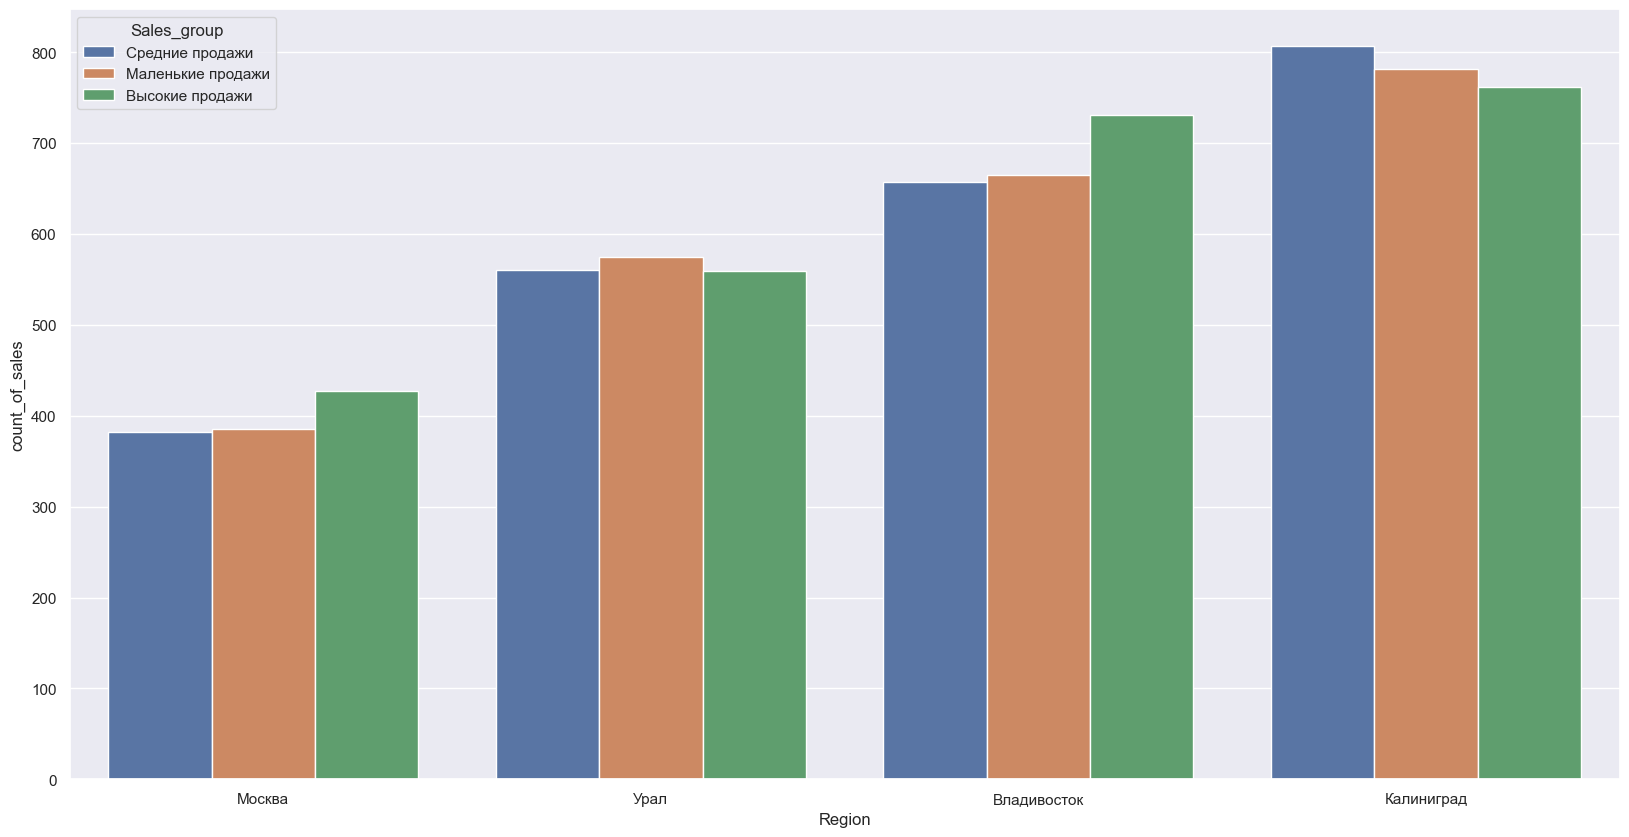

In [193]:
sns.barplot(data = df_sales_group.groupby(['Region', 'Sales_group']).agg({'ID': 'count'}).sort_values('ID').rename(columns = {'ID': 'count_of_sales'}), x = 'Region', y = 'count_of_sales', hue = 'Sales_group', estimator = 'sum')

Задание 3
Суммарно больше всего продаж в Калининграде, меньше всего в Москве. В Москве в большинестве преобладают высокие продажи, в Урале маленькие, во Владивостоке высокие, в Калининграде средние. Необходимо более детально проанализировать продажми в Москве и Калининграде, т.к. непонятно почему в самом большом среди групп по населению городе меньше всех продаж и наоборот в случае с Калининградом.
